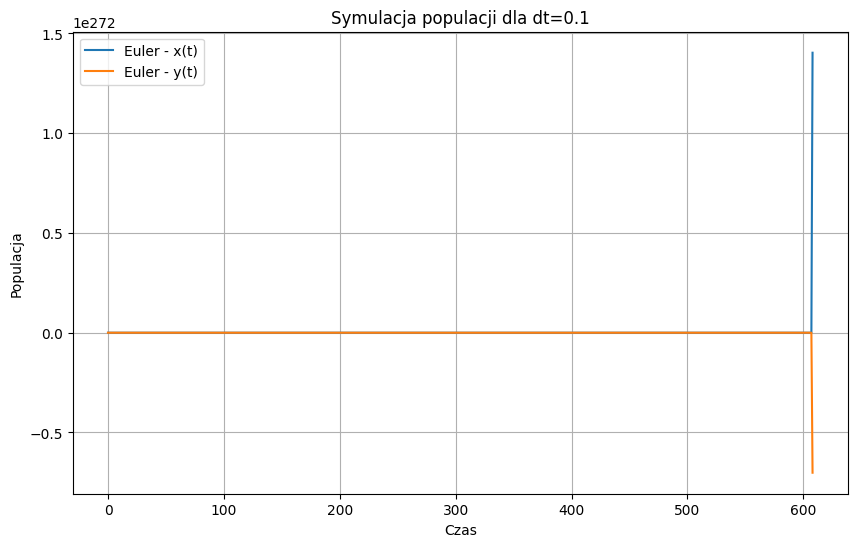

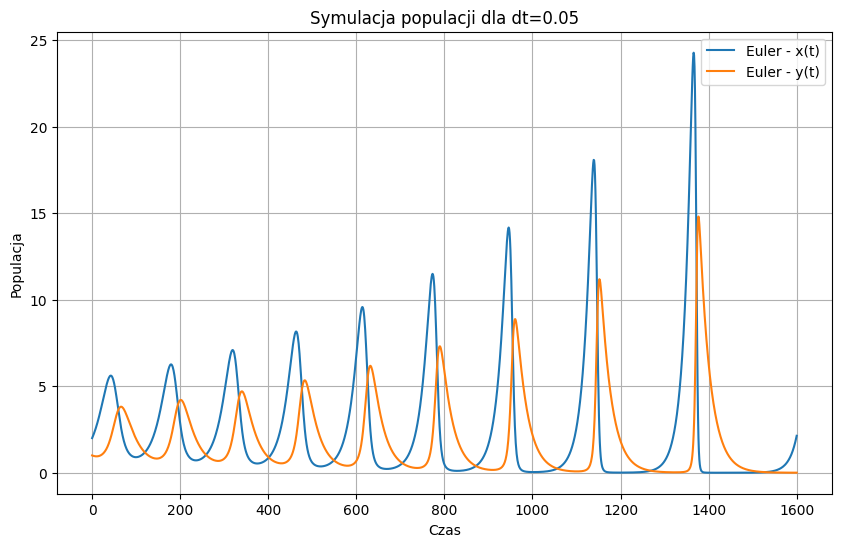

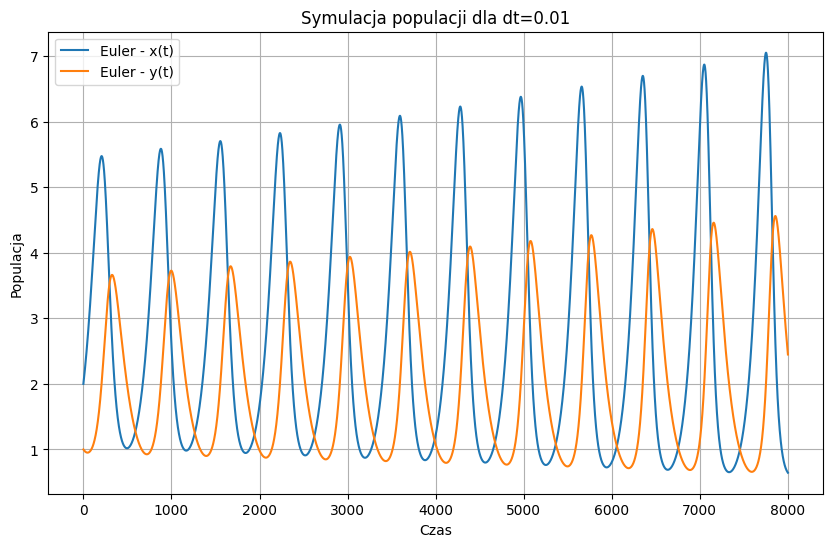

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def euler_method(a, b, c, d, x0, y0, dt, steps):
    x_values = [x0]
    y_values = [y0]
    for _ in range(steps):
        dx_dt = a * x_values[-1] - b * x_values[-1] * y_values[-1]
        dy_dt = c * x_values[-1] * y_values[-1] - d * y_values[-1]
        x_new = x_values[-1] + dx_dt * dt
        y_new = y_values[-1] + dy_dt * dt
        x_values.append(x_new)
        y_values.append(y_new)
    return x_values, y_values

# Funkcja obliczająca średni błąd aproksymacji
def calculate_average_error(true_values, approx_values):
    errors = np.abs(true_values - approx_values)
    return np.mean(errors)

# Parametry
a = 1.2
b = 0.6
c = 0.3
d = 0.8

# Populacje początkowe
x0 = 2
y0 = 1

# Lista różnych wartości kroku dt
dt_values = [0.1, 0.05, 0.01]

# Wyniki metody Eulera dla różnych wartości kroku dt
for dt in dt_values:
    steps = int(80 / dt)
    x_values, y_values = euler_method(a, b, c, d, x0, y0, dt, steps)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, label='Euler - x(t)')
    plt.plot(y_values, label='Euler - y(t)')
    plt.title(f'Symulacja populacji dla dt={dt}')
    plt.xlabel('Czas')
    plt.ylabel('Populacja')
    plt.legend()
    plt.grid(True)
    plt.show()



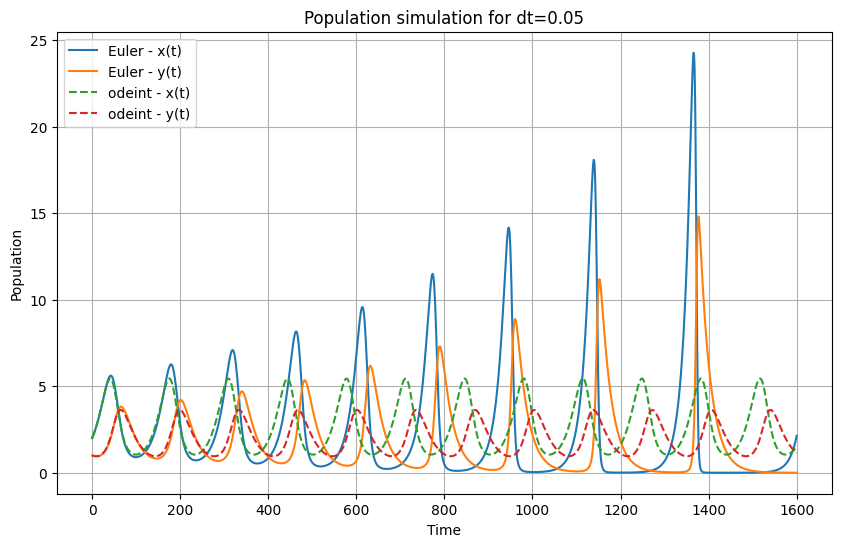

dt=0.05, Average Error for x(t): 2.4437596140948665, Average Error for y(t): 1.583412638014361


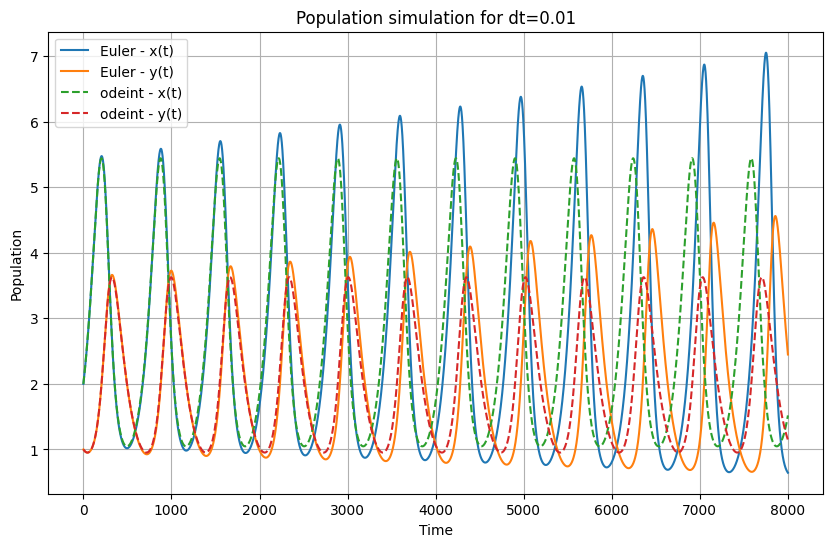

dt=0.01, Average Error for x(t): 0.8149373464424021, Average Error for y(t): 0.5055264320468017


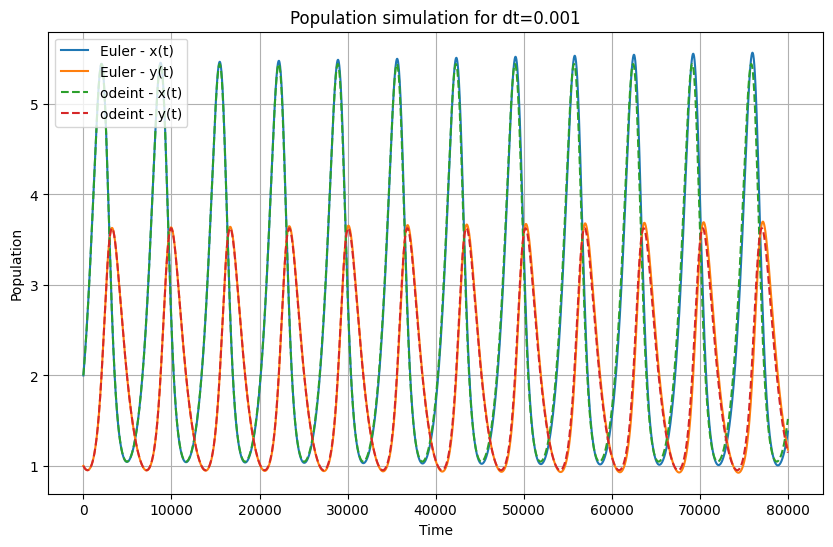

dt=0.001, Average Error for x(t): 0.06583244461491997, Average Error for y(t): 0.04060824939869479


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def euler_method(a, b, c, d, x0, y0, dt, steps):
    x_values = [x0]
    y_values = [y0]
    for _ in range(steps):
        dx_dt = a * x_values[-1] - b * x_values[-1] * y_values[-1]
        dy_dt = c * x_values[-1] * y_values[-1] - d * y_values[-1]
        x_new = x_values[-1] + dx_dt * dt
        y_new = y_values[-1] + dy_dt * dt
        x_values.append(x_new)
        y_values.append(y_new)
    return x_values, y_values

# Функция, вычисляющая среднюю ошибку аппроксимации
def calculate_average_error(true_values, approx_values):
    errors = np.abs(true_values - approx_values)
    return np.mean(errors)

# Параметры
a = 1.2
b = 0.6
c = 0.3
d = 0.8

# Начальные популяции
x0 = 2
y0 = 1

# Список различных значений шага dt
dt_values = [0.05, 0.01, 0.001]

# Результаты метода Эйлера для различных значений шага dt
for dt in dt_values:
    steps = int(80 / dt)
    x_values_euler, y_values_euler = euler_method(a, b, c, d, x0, y0, dt, steps)
    
    # Решение с помощью odeint
    def model(z, t):
        x, y = z
        dx_dt = a * x - b * x * y
        dy_dt = c * x * y - d * y
        return [dx_dt, dy_dt]
    
    t = np.linspace(0, 80, steps + 1)
    z0 = [x0, y0]
    z_odeint = odeint(model, z0, t)
    x_values_odeint = z_odeint[:, 0]
    y_values_odeint = z_odeint[:, 1]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_values_euler, label='Euler - x(t)')
    plt.plot(y_values_euler, label='Euler - y(t)')
    plt.plot(x_values_odeint, label='odeint - x(t)', linestyle='--')
    plt.plot(y_values_odeint, label='odeint - y(t)', linestyle='--')
    plt.title(f'Population simulation for dt={dt}')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.show()

    error_x = calculate_average_error(x_values_odeint, x_values_euler)
    error_y = calculate_average_error(y_values_odeint, y_values_euler)
    print(f"dt={dt}, Average Error for x(t): {error_x}, Average Error for y(t): {error_y}")

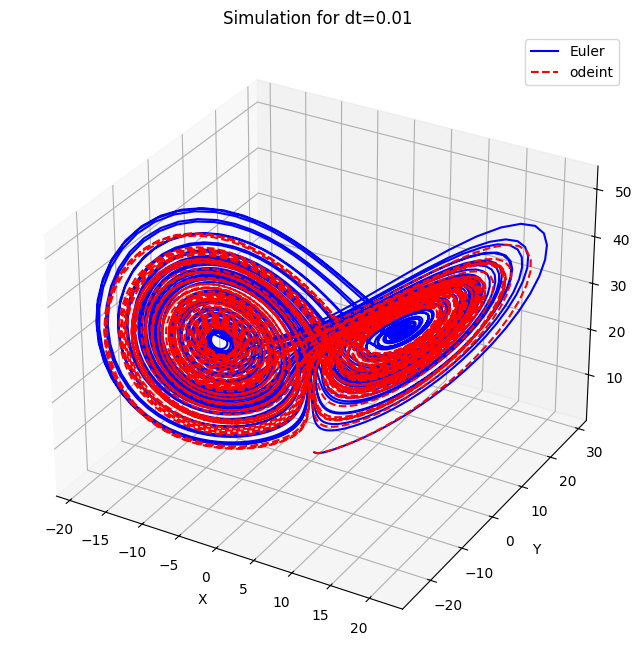

dt=0.01, Average Error for X: 8.581482374633888, Average Error for Y: 9.601881745806123, Average Error for Z: 9.22120213881979


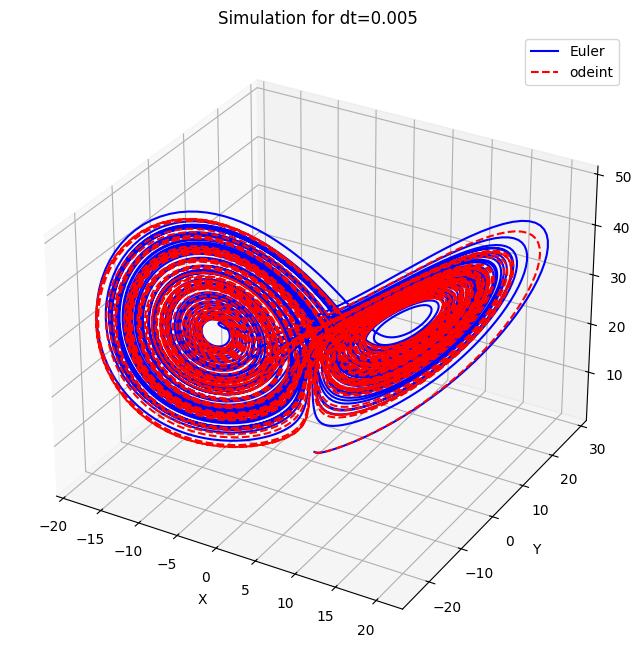

dt=0.005, Average Error for X: 9.177335560170443, Average Error for Y: 10.262938198572584, Average Error for Z: 8.988914991964517


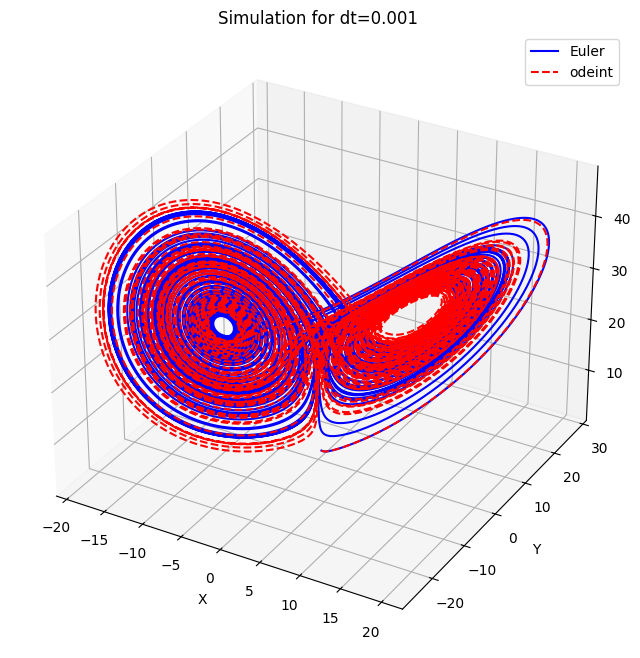

dt=0.001, Average Error for X: 6.946460771812238, Average Error for Y: 7.857654961620313, Average Error for Z: 7.920956509955428


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def euler_method(sigma, rho, beta, x0, y0, z0, dt, steps):
    x_values = [x0]
    y_values = [y0]
    z_values = [z0]
    for _ in range(steps):
        dx_dt = sigma * (y_values[-1] - x_values[-1])
        dy_dt = x_values[-1] * (rho - z_values[-1]) - y_values[-1]
        dz_dt = x_values[-1] * y_values[-1] - beta * z_values[-1]
        x_new = x_values[-1] + dx_dt * dt
        y_new = y_values[-1] + dy_dt * dt
        z_new = z_values[-1] + dz_dt * dt
        x_values.append(x_new)
        y_values.append(y_new)
        z_values.append(z_new)
    return x_values, y_values, z_values

# Funkcja obliczająca średni błąd aproksymacji
def calculate_average_error(true_values, approx_values):
    errors = np.abs(true_values - approx_values)
    return np.mean(errors)

# Parametry modelu Lorenza
sigma = 10
rho = 28
beta = 8/3

# Początkowe warunki
x0 = 0
y0 = 1
z0 = 1.05

# Lista różnych wartości kroku czasowego dt
dt_values = [0.01, 0.005, 0.001]

# Wyniki dla metody Eulera dla różnych wartości dt
for dt in dt_values:
    steps = int(80 / dt)
    x_values_euler, y_values_euler, z_values_euler = euler_method(sigma, rho, beta, x0, y0, z0, dt, steps)
    
    # Rozwiązanie za pomocą odeint
    def model(state, t):
        x, y, z = state
        dx_dt = sigma * (y - x)
        dy_dt = x * (rho - z) - y
        dz_dt = x * y - beta * z
        return [dx_dt, dy_dt, dz_dt]
    
    t = np.linspace(0, 80, steps + 1)
    state0 = [x0, y0, z0]
    state_odeint = odeint(model, state0, t)
    x_values_odeint = state_odeint[:, 0]
    y_values_odeint = state_odeint[:, 1]
    z_values_odeint = state_odeint[:, 2]
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_values_euler, y_values_euler, z_values_euler, label='Euler', color='blue')
    ax.plot(x_values_odeint, y_values_odeint, z_values_odeint, label='odeint', color='red', linestyle='--')
    ax.set_title(f'Simulation for dt={dt}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.show()

    error_x = calculate_average_error(x_values_odeint, x_values_euler)
    error_y = calculate_average_error(y_values_odeint, y_values_euler)
    error_z = calculate_average_error(z_values_odeint, z_values_euler)
    print(f"dt={dt}, Average Error for X: {error_x}, Average Error for Y: {error_y}, Average Error for Z: {error_z}")


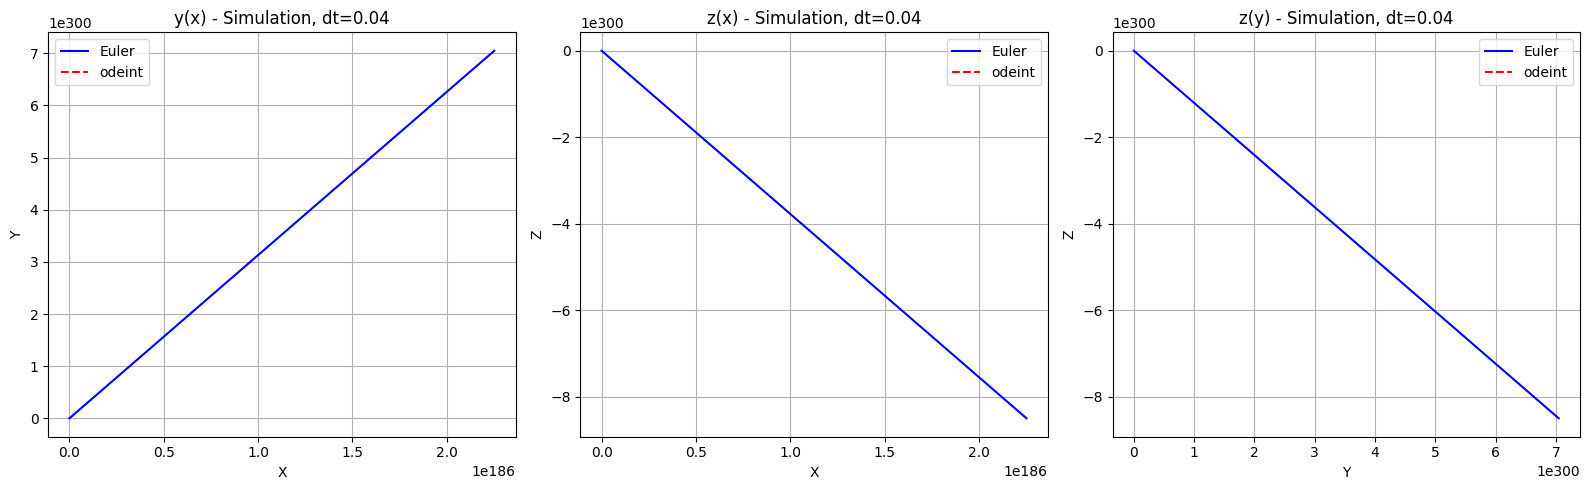

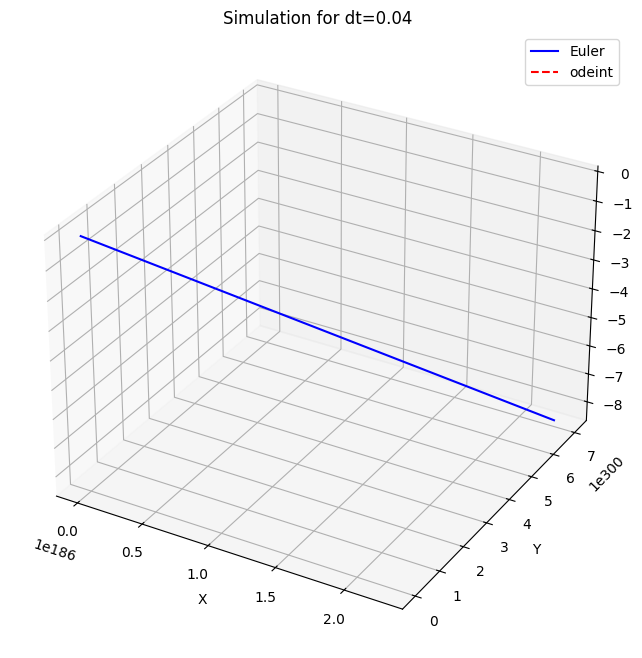

dt=0.04, Average Error for X: nan, Average Error for Y: nan, Average Error for Z: nan


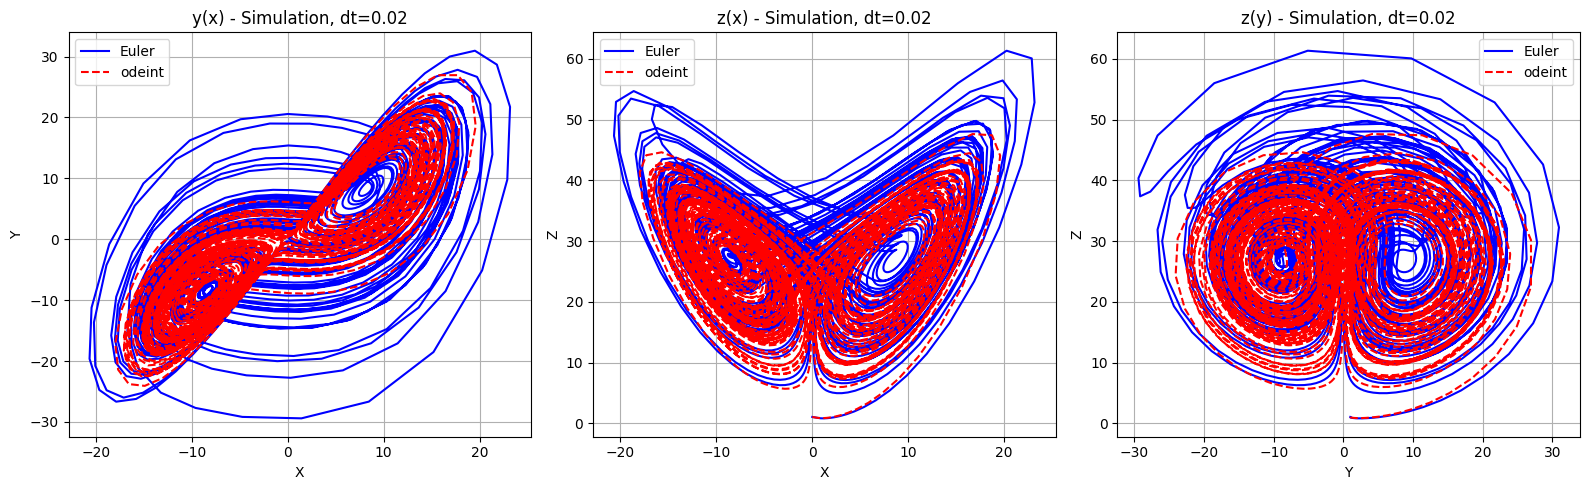

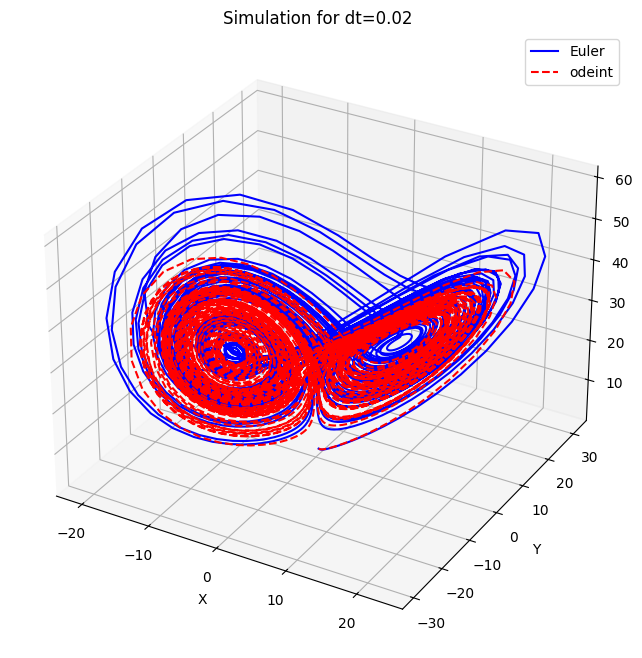

dt=0.02, Average Error for X: 9.160473319570897, Average Error for Y: 10.394051377529555, Average Error for Z: 9.452990585686898


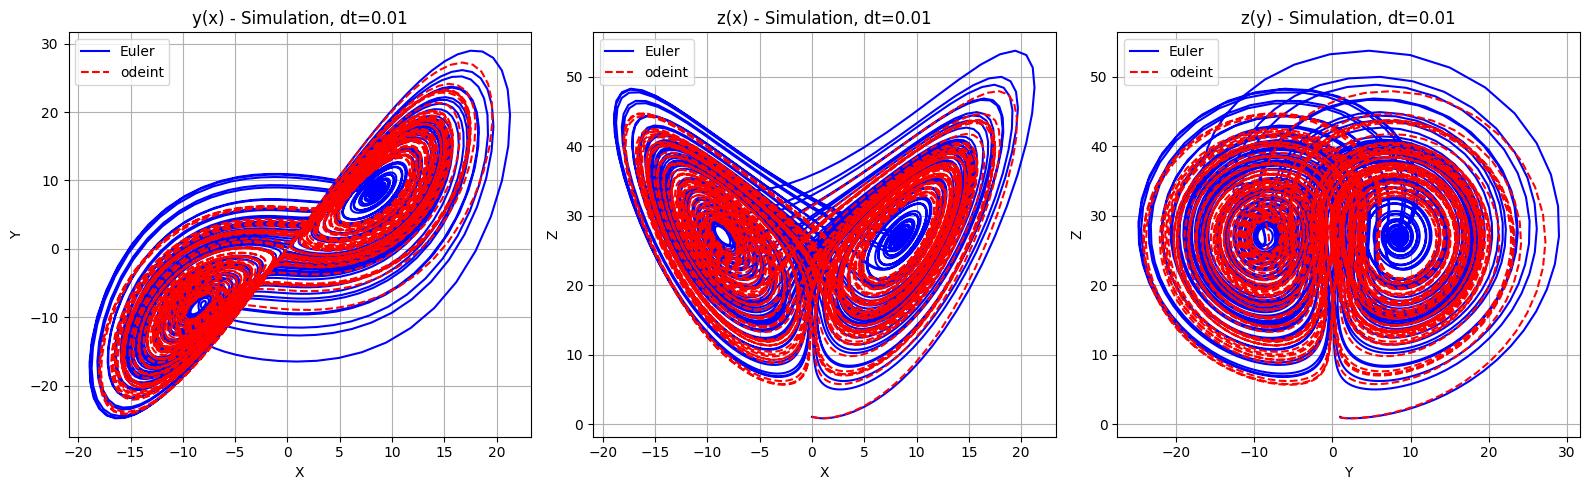

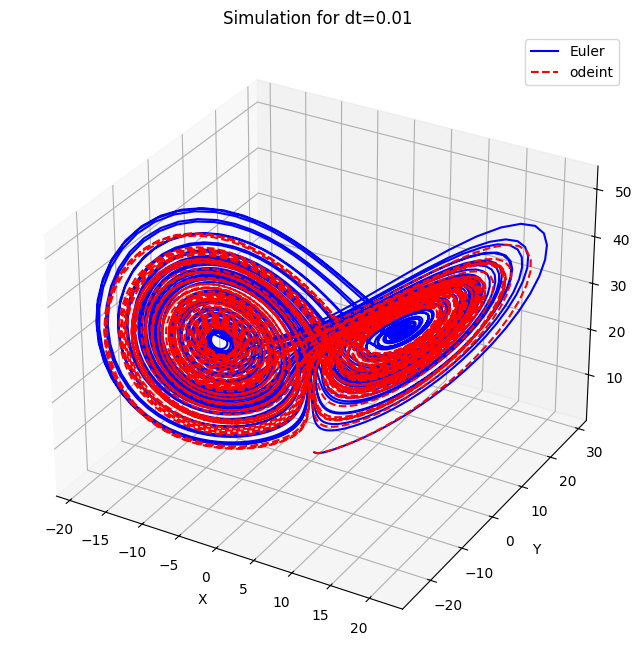

dt=0.01, Average Error for X: 8.581482374633888, Average Error for Y: 9.601881745806123, Average Error for Z: 9.22120213881979


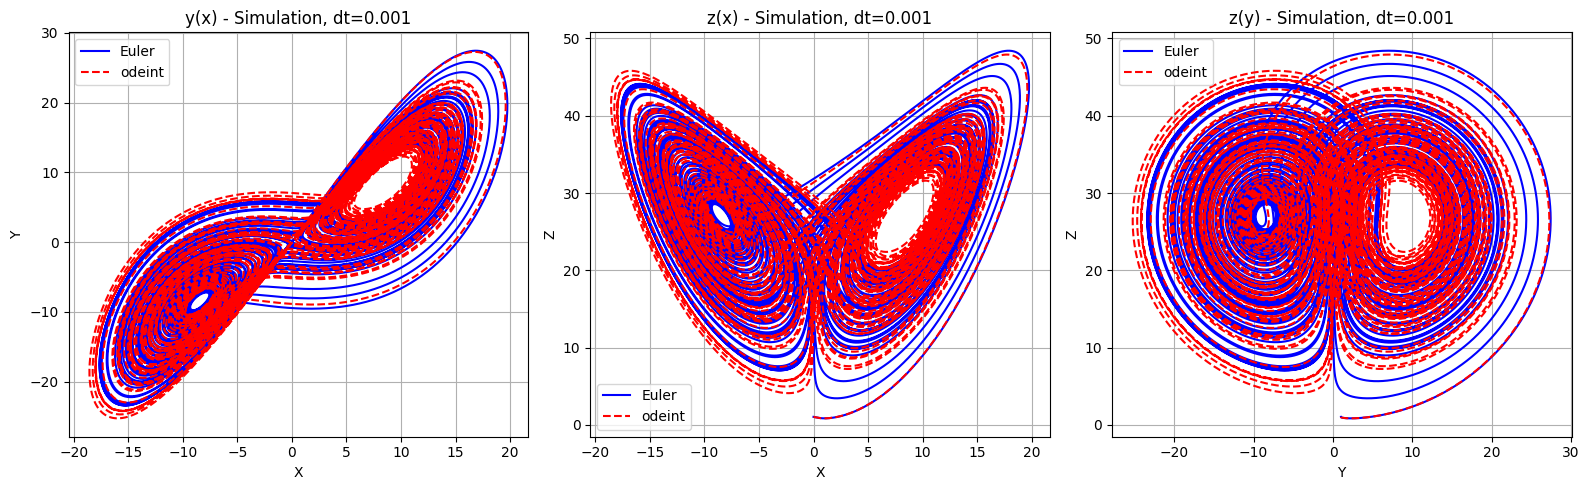

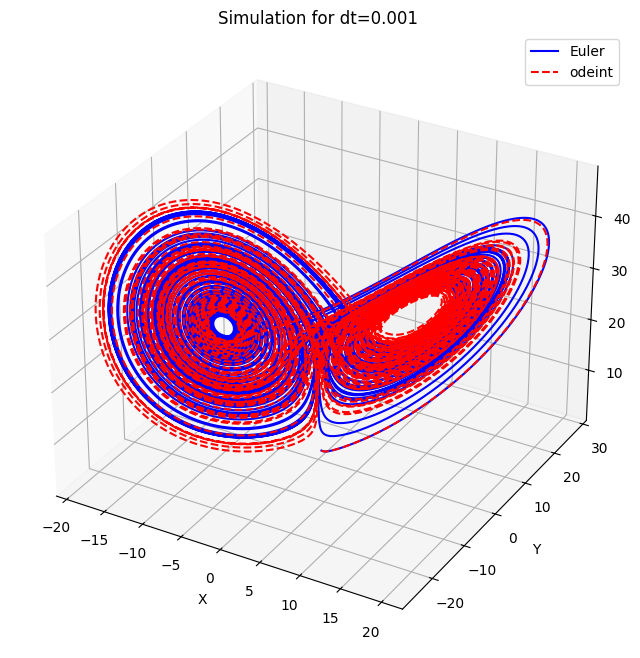

dt=0.001, Average Error for X: 6.946460771812238, Average Error for Y: 7.857654961620313, Average Error for Z: 7.920956509955428


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def euler_method(sigma, rho, beta, x0, y0, z0, dt, steps):
    x_values = [x0]
    y_values = [y0]
    z_values = [z0]
    for _ in range(steps):
        dx_dt = sigma * (y_values[-1] - x_values[-1])
        dy_dt = x_values[-1] * (rho - z_values[-1]) - y_values[-1]
        dz_dt = x_values[-1] * y_values[-1] - beta * z_values[-1]
        x_new = x_values[-1] + dx_dt * dt
        y_new = y_values[-1] + dy_dt * dt
        z_new = z_values[-1] + dz_dt * dt
        x_values.append(x_new)
        y_values.append(y_new)
        z_values.append(z_new)
    return x_values, y_values, z_values

# Funkcja obliczająca średni błąd aproksymacji
def calculate_average_error(true_values, approx_values):
    errors = np.abs(true_values - approx_values)
    return np.mean(errors)

# Parametry modelu Lorenza
sigma = 10
rho = 28
beta = 8/3

# Początkowe warunki
x0 = 0
y0 = 1
z0 = 1.05

# Lista różnych wartości kroku czasowego dt
dt_values = [ 0.04, 0.02, 0.01, 0.001]

# Wyniki dla metody Eulera dla różnych wartości dt
for dt in dt_values:
    steps = int(80 / dt)
    x_values_euler, y_values_euler, z_values_euler = euler_method(sigma, rho, beta, x0, y0, z0, dt, steps)
    
    # Rozwiązanie za pomocą odeint
    def model(state, t):
        x, y, z = state
        dx_dt = sigma * (y - x)
        dy_dt = x * (rho - z) - y
        dz_dt = x * y - beta * z
        return [dx_dt, dy_dt, dz_dt]
    
    t = np.linspace(0, 80, steps + 1)
    state0 = [x0, y0, z0]
    state_odeint = odeint(model, state0, t)
    x_values_odeint = state_odeint[:, 0]
    y_values_odeint = state_odeint[:, 1]
    z_values_odeint = state_odeint[:, 2]
    
    fig = plt.figure(figsize=(16, 5))

    # Wykres y(x)
    plt.subplot(1, 3, 1)
    plt.plot(x_values_euler, y_values_euler, label='Euler', color='blue')
    plt.plot(x_values_odeint, y_values_odeint, label='odeint', color='red', linestyle='--')
    plt.title(f'y(x) - Simulation, dt={dt}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)

    # Wykres z(x)
    plt.subplot(1, 3, 2)
    plt.plot(x_values_euler, z_values_euler, label='Euler', color='blue')
    plt.plot(x_values_odeint, z_values_odeint, label='odeint', color='red', linestyle='--')
    plt.title(f'z(x) - Simulation, dt={dt}')
    plt.xlabel('X')
    plt.ylabel('Z')
    plt.legend()
    plt.grid(True)

    # Wykres z(y)
    plt.subplot(1, 3, 3)
    plt.plot(y_values_euler, z_values_euler, label='Euler', color='blue')
    plt.plot(y_values_odeint, z_values_odeint, label='odeint', color='red', linestyle='--')
    plt.title(f'z(y) - Simulation, dt={dt}')
    plt.xlabel('Y')
    plt.ylabel('Z')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_values_euler, y_values_euler, z_values_euler, label='Euler', color='blue')
    ax.plot(x_values_odeint, y_values_odeint, z_values_odeint, label='odeint', color='red', linestyle='--')
    ax.set_title(f'Simulation for dt={dt}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.show()

    error_x = calculate_average_error(x_values_odeint, x_values_euler)
    error_y = calculate_average_error(y_values_odeint, y_values_euler)
    error_z = calculate_average_error(z_values_odeint, z_values_euler)
    print(f"dt={dt}, Average Error for X: {error_x}, Average Error for Y: {error_y}, Average Error for Z: {error_z}")
